In [11]:
import pandas as pd

df = pd.read_pickle("jan8_preliminary_sampled_stimuli.pickle")
df

,img_path,caption,foil,linguistic_phenomena,clip_pred_caption,clip_pred_foil,clip_pred_diff,performance_group
468,../VALSE_data/images/coco2017/000000122672.jpg,A man is riding a surfboard through a wave.,A man is riding a surfboard against a wave.,relations,31.702688,32.111187,-0.408499,low_perf
274,../VALSE_data/images/coco2017/000000427649.jpg,The boat sits in the lake below the mountain.,The boat sits in the lake on the mountain.,relations,27.193933,27.211042,-0.017109,low_perf
243,../VALSE_data/images/coco2017/000000451150.jpg,Half a dozen donuts are sitting in a box.,Half a dozen donuts are sitting near a box.,relations,30.128731,30.556664,-0.427933,low_perf
376,../VALSE_data/images/coco2017/000000546659.jpg,A locomotive train carrying carts down a track.,A locomotive train carrying carts up a track.,relations,29.779469,29.801533,-0.022064,low_perf
520,../VALSE_data/images/coco2017/000000229858.jpg,An adult and baby moose step out of a busy thi...,An adult and baby moose step inside of a busy ...,relations,32.175686,33.472778,-1.297092,low_perf
...,...,...,...,...,...,...,...,...
1412,../VALSE_data/images/swig/packaging_189.jpg,A young buck packages up a broom.,A young buck heaves up a broom.,actions,27.694311,22.859179,4.835133,high_perf
1550,../VALSE_data/images/swig/chasing_258.jpg,A hunter chases after a American bison.,A hunter forags after a American bison.,actions,37.372082,35.013138,2.358944,high_perf
1783,../VALSE_data/images/swig/tugging_29.jpg,A person tugs a power cord.,A power cord tugs on a person.,actions,24.806143,22.592257,2.213886,high_perf
1206,../VALSE_data/images/swig/coaching_90.jpg,A woman coaches people.,A woman reads people.,actions,28.184359,18.201620,9.982738,high_perf


Filter to one phenomena only and then graph all of them to inspect

In [3]:
filtered_df = df[df['linguistic_phenomena'] == "existence"]

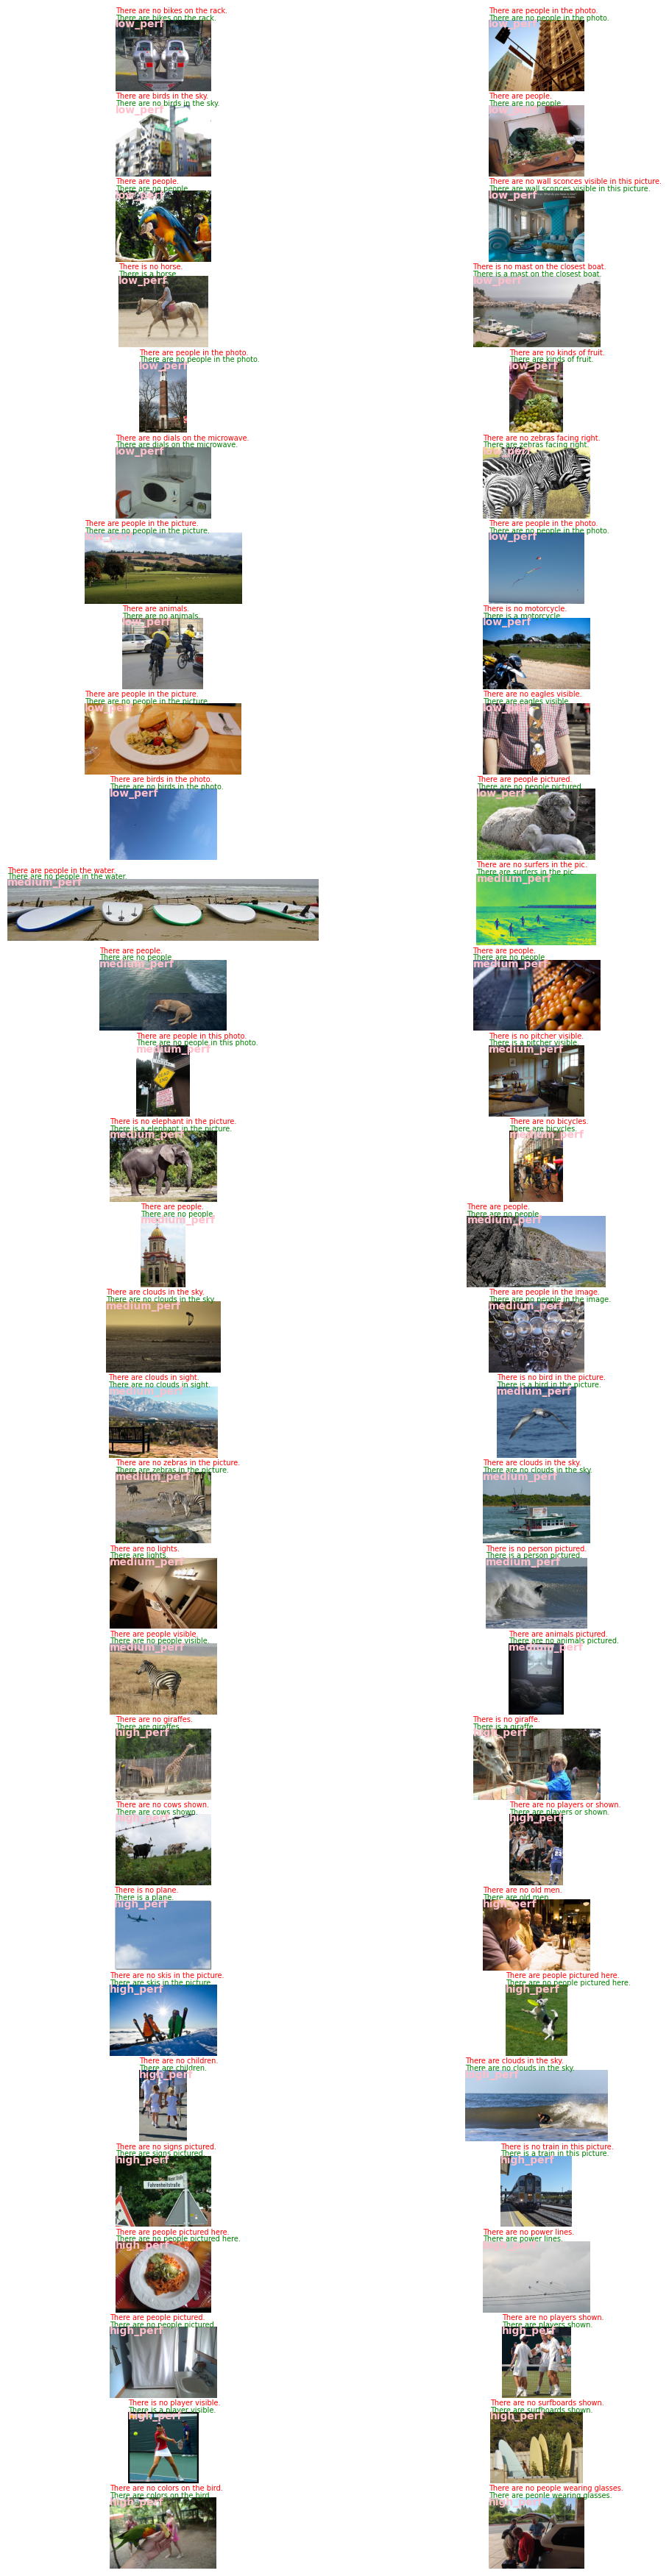

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(12, 45))  # Adjust the size as needed

for i, (_, row) in enumerate(filtered_df.iterrows()):
    ax = plt.subplot(30, 2, i + 1)
    
    # show image
    img = Image.open(row['img_path'])
    plt.imshow(img)
    plt.axis('off')  

    # text labels
    fontsize = 7
    plt.text(0, 1, row['caption'], color='green', transform=ax.transAxes, fontsize=fontsize)
    plt.text(0, 1.1, row['foil'], color='red', transform=ax.transAxes, fontsize = fontsize)
    plt.text(0, 0.9, row['performance_group'], color='pink', fontweight='bold', transform=ax.transAxes)

# Adjust the layout
plt.show()

### Export all images at maximum blur

In [12]:
import os
import cv2 as cv
import numpy as np

def add_text_to_image(image, caption, foil, filename):
    white_space_height = 100  # Adjust as needed

    white_space = 255 * np.ones((white_space_height, image.shape[1], 3), np.uint8)

    combined_image = cv.vconcat([image, white_space])

    font = cv.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    font_thickness = 2

    # add text to the white space
    cv.putText(combined_image, caption, (10, image.shape[0] + 30), font, font_scale, (0, 255, 0), font_thickness)
    cv.putText(combined_image, foil, (10, image.shape[0] + 60), font, font_scale, (0, 0, 255), font_thickness)
    cv.putText(combined_image, filename, (10, image.shape[0] + 90), font, font_scale/1.5, (128, 128, 128), 1)

    return combined_image


for _, row in filtered_df.iterrows():

    image = cv.imread(row['img_path'])

    blurred_image = cv.GaussianBlur(image, (99,99),0)
    final_image = add_text_to_image(blurred_image, row['caption'], row['foil'], os.path.basename(row['img_path']))

    cv.imwrite(os.path.join("google_form_images", os.path.basename(row['img_path'])), final_image)

    print(os.path.basename(row['img_path']))
    #print("Caption (correct):", row['caption'])
    #print("Foil (incorrect):", row['foil'],"\n")

v7w_2389519.jpg
v7w_2316446.jpg
v7w_2345066.jpg
v7w_2370812.jpg
v7w_2349587.jpg
v7w_2401335.jpg
v7w_2361201.jpg
v7w_2363335.jpg
v7w_2411632.jpg
v7w_2323857.jpg
v7w_2408510.jpg
v7w_2359039.jpg
v7w_2335370.jpg
v7w_2380468.jpg
v7w_2359029.jpg
v7w_2367703.jpg
v7w_2406996.jpg
v7w_2362476.jpg
v7w_2374842.jpg
v7w_2403284.jpg
v7w_2390850.jpg
v7w_2345325.jpg
v7w_2342550.jpg
v7w_2336798.jpg
v7w_2394557.jpg
v7w_2363617.jpg
v7w_2364948.jpg
v7w_1591818.jpg
v7w_713731.jpg
v7w_2345780.jpg
v7w_2352298.jpg
v7w_2328270.jpg
v7w_150392.jpg
v7w_2360186.jpg
v7w_2411942.jpg
v7w_2373121.jpg
v7w_2318073.jpg
v7w_2359944.jpg
v7w_2373845.jpg
v7w_2325309.jpg
v7w_2410671.jpg
v7w_2367084.jpg
v7w_2361437.jpg
v7w_2393355.jpg
v7w_2362253.jpg
v7w_1159443.jpg
v7w_2339363.jpg
v7w_2331050.jpg
v7w_2324297.jpg
v7w_2402139.jpg
v7w_2360434.jpg
v7w_2361951.jpg
v7w_2401288.jpg
v7w_2407816.jpg
v7w_2385384.jpg
v7w_2346628.jpg
v7w_2370926.jpg
v7w_2401445.jpg
v7w_2417412.jpg
v7w_2416322.jpg
